In [30]:
#Import Libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

## Data Analyst



In [190]:
# Define the directory paths for the training and validation sets
training_set = 'Data_Plant_Disease/train'
valid_set = 'Data_Plant_Disease/valid'
# Get the list of diseases by listing the subdirectories in the training set
diseases = os.listdir(training_set)

# Print the list of diseases
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [35]:
# Print the number of classes or diseases present in the train_data
print("Number of classes : ",len(diseases))

Number of classes :  38


In [37]:
# Count the number of images per class in the training data directory and display the counts in a DataFrame
nums_train={}
nums_valid={}
for disease in diseases:
    nums_train[disease]=len(os.listdir(training_set+'/'+disease))
    nums_valid[disease]=len(os.listdir(valid_set+'/'+disease))
image_class_count_train=pd.DataFrame(nums_train.values(),index=nums_train.keys(),columns=['No. of images'])
print('Training data images count per class : ',)
print(image_class_count_train)

Training data images count per class : 
                                                    No. of images
Apple___Apple_scab                                           2017
Apple___Black_rot                                            1987
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008
Blueberry___healthy                                          1816
Cherry_(including_sour)___healthy                            1826
Cherry_(including_sour)___Powdery_mildew                     1683
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Corn_(maize)___Common_rust_                                  1907
Corn_(maize)___healthy                                       1859
Corn_(maize)___Northern_Leaf_Blight                          1908
Grape___Black_rot                                            1888
Grape___Esca_(Black_Measles)                                 1920
Grape___healthy                     

In [39]:
# Count the number of images per class in the validation data directory and display the counts in a DataFrame
image_class_count_valid=pd.DataFrame(nums_valid.values(),index=nums_valid.keys(),columns=['No. of images'])
print('Validation data images count per class : ',)
print(image_class_count_valid)

Validation data images count per class : 
                                                    No. of images
Apple___Apple_scab                                            505
Apple___Black_rot                                             497
Apple___Cedar_apple_rust                                      440
Apple___healthy                                               502
Blueberry___healthy                                           455
Cherry_(including_sour)___healthy                             456
Cherry_(including_sour)___Powdery_mildew                      421
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            410
Corn_(maize)___Common_rust_                                   477
Corn_(maize)___healthy                                        465
Corn_(maize)___Northern_Leaf_Blight                           477
Grape___Black_rot                                             472
Grape___Esca_(Black_Measles)                                  480
Grape___healthy                   

C:\Users\tanvu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


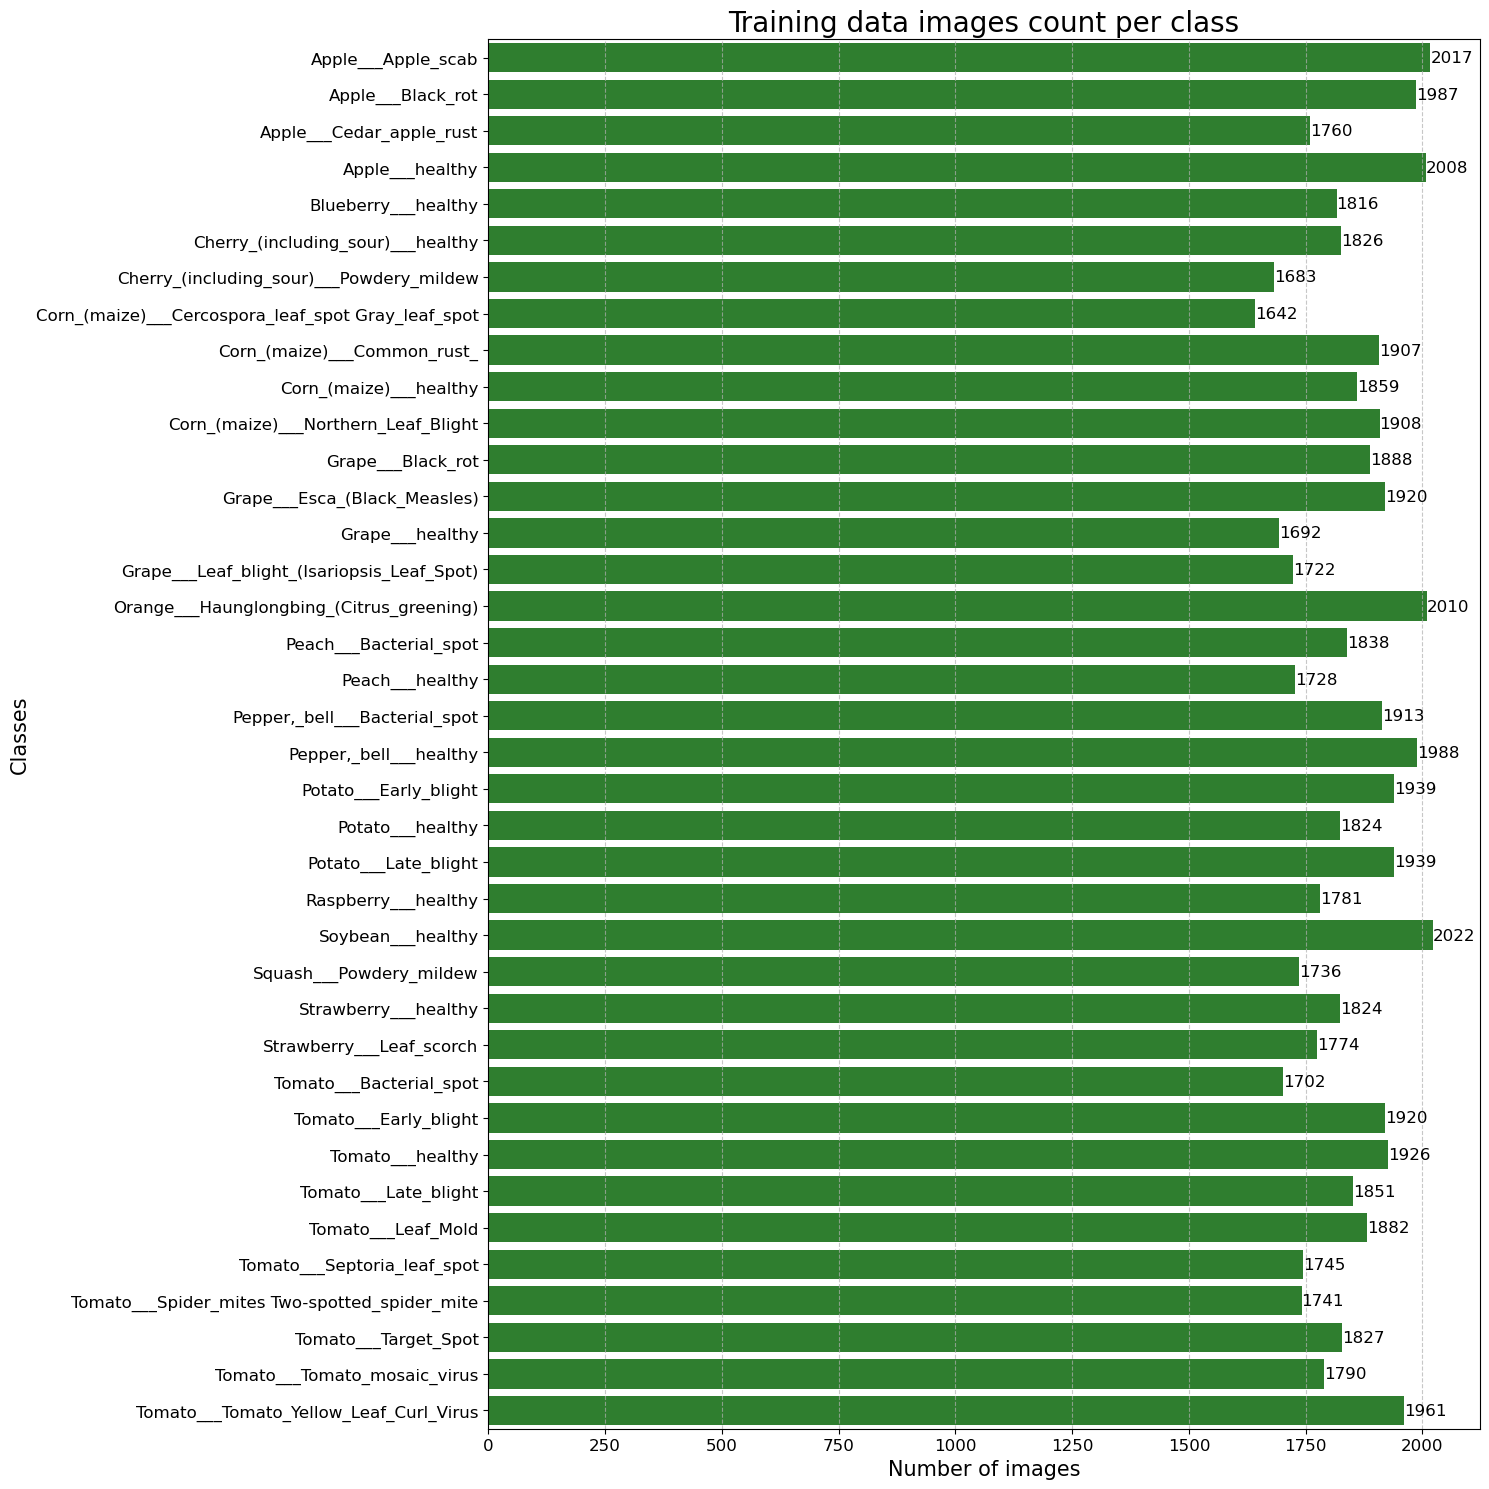

In [41]:
# Create a bar plot showing the count of training images per class
plt.figure(figsize=(15,15))
plt.title("Training data images count per class", fontsize=20)
plt.xlabel('Number of images', fontsize=15)
plt.ylabel('Classes', fontsize=15)

# Convert keys and values to lists
keys = list(nums_train.keys())
vals = list(nums_train.values())

# Create the bar plot with a single light color
sns.barplot(y=keys, x=vals, color='forestgreen')

# Improve the aesthetics
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels
for index, value in enumerate(vals):
    plt.text(value, index, f'{value}', fontsize=12, va='center')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\tanvu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


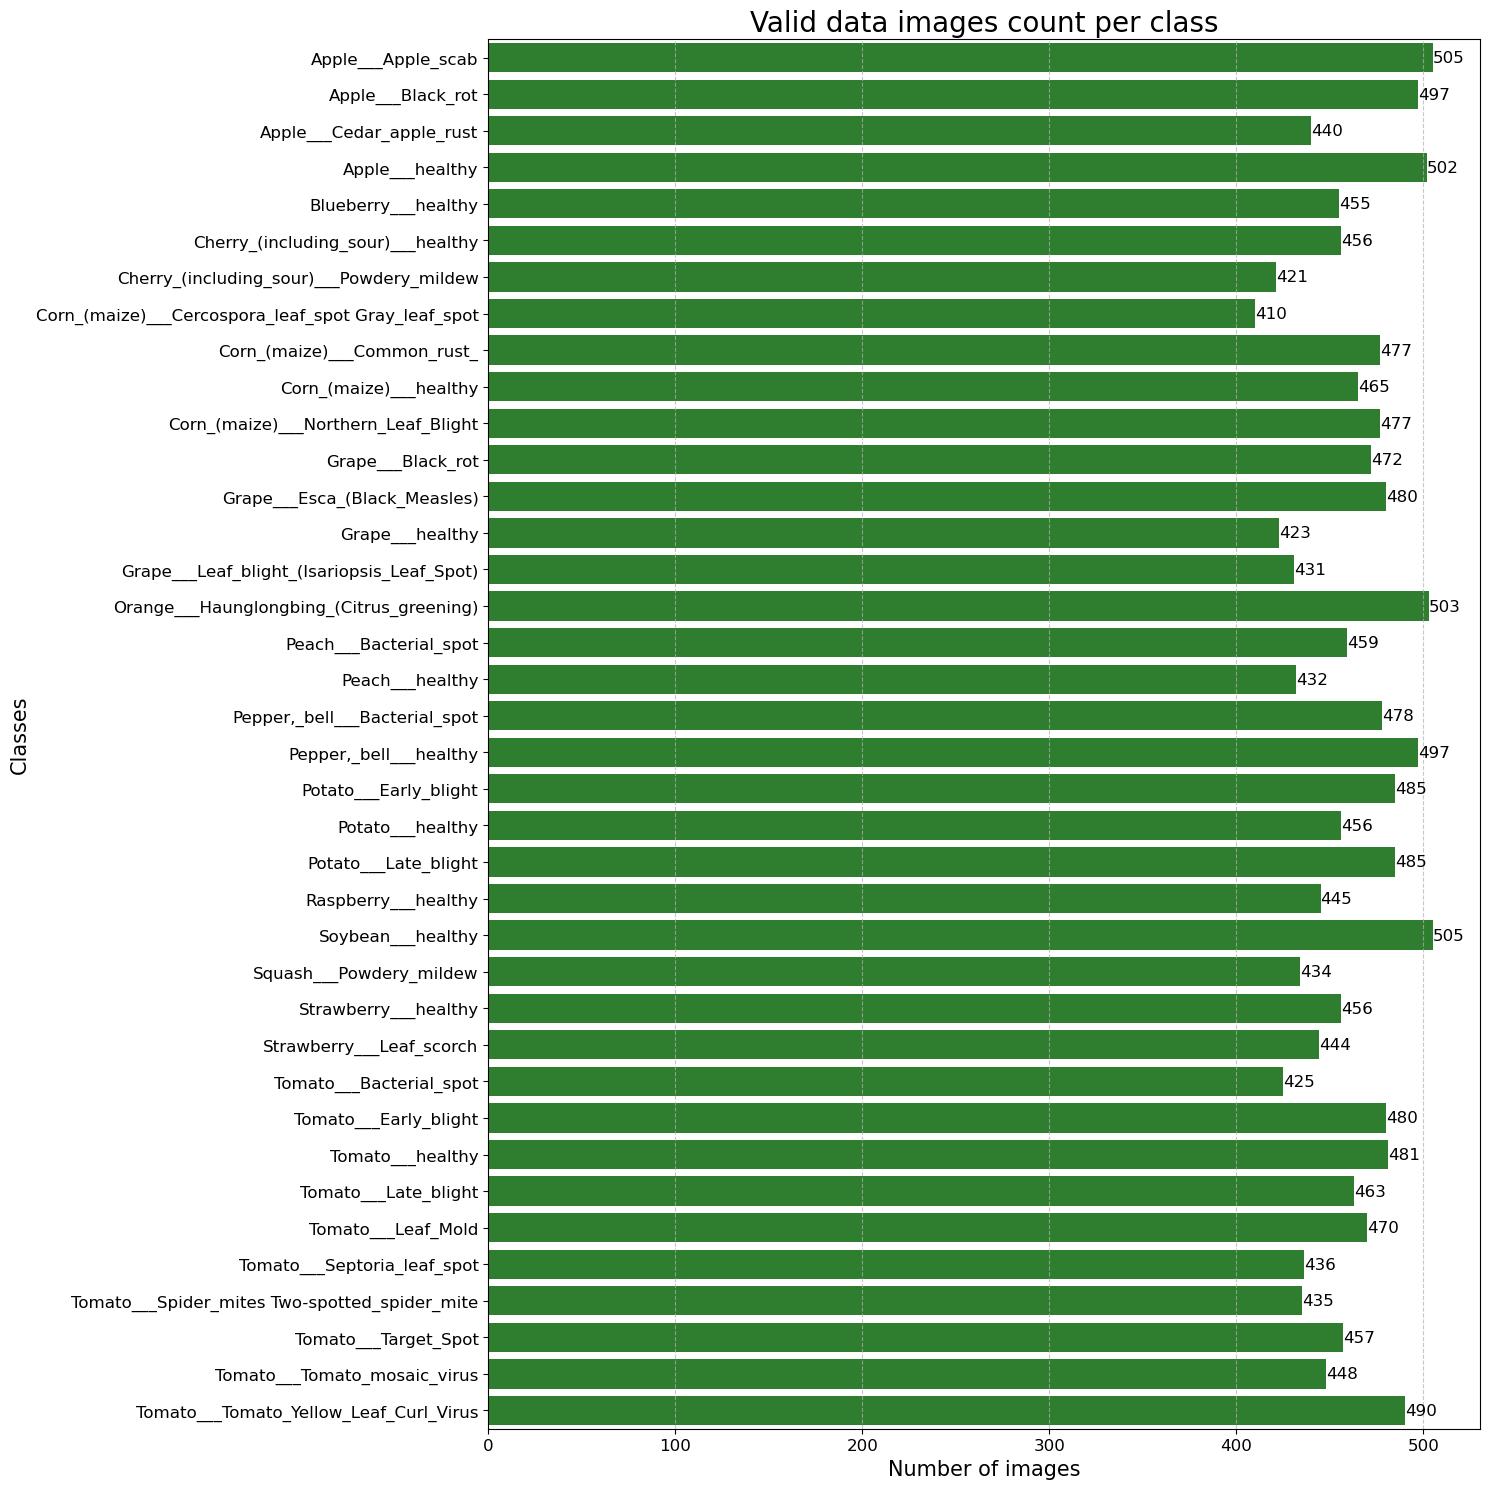

In [42]:
# Create a bar plot showing the count of valid images per class
plt.figure(figsize=(15,15))
plt.title("Valid data images count per class", fontsize=20)
plt.xlabel('Number of images', fontsize=15)
plt.ylabel('Classes', fontsize=15)

# Convert keys and values to lists
keys = list(nums_valid.keys())
vals = list(nums_valid.values())

# Create the bar plot with a single light color
sns.barplot(y=keys, x=vals, color='forestgreen')

# Improve the aesthetics
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels
for index, value in enumerate(vals):
    plt.text(value, index, f'{value}', fontsize=12, va='center')

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
#  Calculate the total number of images for training
total_train=0
for value in nums_train.values():
    total_train+=value
print("Total number of images for training : ", total_train)

Total number of images for training :  70296


In [45]:
#  Calculate the total number of images for validation
total_valid=0
for value in nums_valid.values():
    total_valid+=value
print("Total number of images for validation : ", total_valid)

Total number of images for validation :  17575


In [47]:
# Extract unique plant names and unique disease names from the list of diseases.
plants_unique=[]
diseases_unique=[]
for i in diseases:
    if(i.split('__'))[0] not in plants_unique:
        plants_unique.append(i.split('__')[0])
    if(i.split('___'))[1] != 'healthy':
        diseases_unique.append(i.split('___')[1])

In [51]:
# Print the unique plant names extracted from the list of diseases and display the total number of unique plant names
print('Plants : ', plants_unique)
print('-'*100)
print('Number of plants : ', len(plants_unique))

Plants :  ['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']
----------------------------------------------------------------------------------------------------
Number of plants :  14


In [53]:
# Print the unique plant diseases extracted from the list of diseases and display the total number of unique plant diseases
print('Diseases : ', diseases_unique)
print('-'*100)
print('Number of diseases : ', len(diseases_unique))

Diseases :  ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'Powdery_mildew', 'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_', 'Northern_Leaf_Blight', 'Black_rot', 'Esca_(Black_Measles)', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Haunglongbing_(Citrus_greening)', 'Bacterial_spot', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Powdery_mildew', 'Leaf_scorch', 'Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_mosaic_virus', 'Tomato_Yellow_Leaf_Curl_Virus']
----------------------------------------------------------------------------------------------------
Number of diseases :  26


### Training Image Preprocessing

In [60]:
train_set = tf.keras.utils.image_dataset_from_directory(
    training_set,
    labels="inferred", #"inferred": Các nhãn sẽ được tạo ra từ cấu trúc thư mục
    label_mode="categorical", #categorical": Nhãn được mã hóa dưới dạng categorical
    class_names=None, #Chỉ hợp lệ nếu labels là "inferred"
    color_mode="rgb", 
    batch_size=32,    #mô hình sẽ lấy 32 hình ảnh từ tập dữ liệu để huấn luyện. 
                      #Quá trình này sẽ lặp lại cho đến khi tất cả 1,000 hình ảnh được sử dụng. 
                      #Cụ thể, sẽ có 1,000 / 32 = 31 batch
    
    image_size=(128, 128), 
    shuffle=True,     #Có xáo trộn dữ liệu hay không. Mặc định là True. 
                      #Nếu đặt là False, dữ liệu sẽ được sắp xếp theo thứ tự chữ cái.
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70299 files belonging to 38 classes.


### Valid Image Preprocessing

In [65]:
val_set = tf.keras.utils.image_dataset_from_directory(
    valid_set,
    labels="inferred", #"inferred": Các nhãn sẽ được tạo ra từ cấu trúc thư mục
    label_mode="categorical", #int": Nhãn được mã hóa dưới dạng số nguyên 
    class_names=None, #Chỉ hợp lệ nếu labels là "inferred"
    color_mode="rgb", 
    batch_size=32,    #mô hình sẽ lấy 32 hình ảnh từ tập dữ liệu để huấn luyện. 
                      #Quá trình này sẽ lặp lại cho đến khi tất cả 1,000 hình ảnh được sử dụng. 
                      #Cụ thể, sẽ có 1,000 / 32 = 31 batch
    
    image_size=(128, 128), 
    shuffle=True,     #Có xáo trộn dữ liệu hay không. Mặc định là True. 
                      #Nếu đặt là False, dữ liệu sẽ được sắp xếp theo thứ tự chữ cái.
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17577 files belonging to 38 classes.


### Tránh Overshooting
1. Chọn một learning rate nhỏ hơn là 0,0001 thay vì mặc định là 0,001 của adam
2. Tránh underfiting khi sử dựng learning rate nhỏ thì tăng số lượng neuron trong lớp Dense
3. Padding 'same' làm tăng tham số vậy nên để giảm tham số thì điều chỉnh padding 'same' cho phù hợp

### Building Model

In [113]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D ,Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [115]:
model = Sequential()

#### Building Convolution Layer

In [118]:
model.add(Conv2D(filters=32, kernel_size = 3, padding='same', activation='relu', input_shape = (128,128,3)))
model.add(Conv2D(filters=32, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2)) # Giảm một nửa do stride = 2

C:\Users\tanvu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
model.add(Conv2D(filters=64, kernel_size = 3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [122]:
model.add(Conv2D(filters=128, kernel_size = 3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [124]:
model.add(Conv2D(filters=256, kernel_size = 3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [126]:
#Thêm các lớp Convolutional để tăng khả năng học của nó tránh underfiting
model.add(Conv2D(filters=512, kernel_size = 3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2)) 

In [128]:
model.add(Dropout(0.25)) #Giảm 25% neuro ngẫu nhiên của lớp Conv tránh giảm bớt hiện tượng overfitting mà không làm mất quá nhiều thông tin quan trọng từ các đặc trưng học được

In [130]:
model.add(Flatten())

In [132]:
model.add(Dense(units=1500, activation = 'relu'))

In [134]:
model.add(Dropout(0.4)) #Lớp Dense có nhiều tham số hơn và do đó dễ bị overfitting hơn. Việc giảm 40% số neuron trong lớp Dense giúp ngăn chặn hiện tượng overfitting hiệu quả hơn

In [136]:
#Output Layer
model.add(Dense(units=38, activation = 'softmax'))

### Compiling Model (Mô hình tối ưu)

In [139]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [141]:
model.summary()
 #(None, 128, 128, 32) 128x128 là kích thước ảnh đầu ra, 32 là 32 bộ lọc
 #Params lớn thì tốc độ mô hình train chậm
 #Padding 'same' làm tăng tham số

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training


In [150]:
train_history = model.fit(x = train_set, validation_data = val_set, epochs = 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2796s 1s/step - accuracy: 0.3850 - loss: 2.1948 - val_accuracy: 0.8343 - val_loss: 0.5109
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2780s 1s/step - accuracy: 0.8334 - loss: 0.5257 - val_accuracy: 0.9117 - val_loss: 0.2772
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3880s 2s/step - accuracy: 0.9059 - loss: 0.2955 - val_accuracy: 0.9263 - val_loss: 0.2247
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1694s 771ms/step - accuracy: 0.9345 - loss: 0.2074 - val_accuracy: 0.9511 - val_loss: 0.1577
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 690s 314ms/step - accuracy: 0.9499 - loss: 0.1520 - val_accuracy: 0.9529 - val_loss: 0.1499
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 647s 294ms/step - accuracy: 0.9627 - loss: 0.1114 - val_accuracy: 0.9602 - val_loss: 0.1257
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 642s 292ms/step - accuracy: 0.9700 - loss: 0.0937 - val_accuracy: 0.9699 - val_loss: 0.1003
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 642s 292ms/step - accurac

### Model Evaluation

In [157]:
#Model on training set
train_loss, train_accuracy = model.evaluate(train_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 176s 80ms/step - accuracy: 0.9862 - loss: 0.0454


In [159]:
#Model on validation set
valid_loss, valid_accuracy = model.evaluate(val_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 45s 81ms/step - accuracy: 0.9631 - loss: 0.1233


### Saving Model

In [165]:
model.save("trained_plant_disease_model.keras")

### Accuracy Visualization

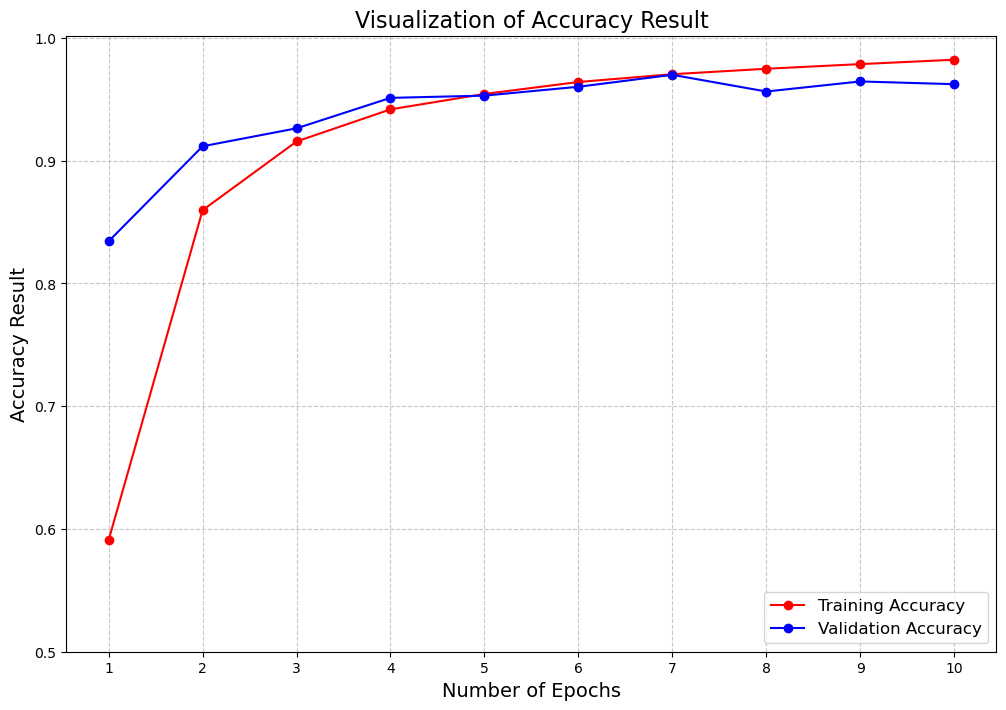

In [178]:
# Lấy dữ liệu từ lịch sử huấn luyện
epochs = [i for i in range(1,11)]

plt.figure(figsize=(12, 8))
plt.plot(epochs, train_history.history['accuracy'], 'r-', marker='o', label='Training Accuracy')
plt.plot(epochs,train_history.history['val_accuracy'], 'b-', marker='o', label='Validation Accuracy')
plt.xlabel('Number of Epochs', fontsize=14)
plt.ylabel('Accuracy Result', fontsize=14)
plt.title('Visualization of Accuracy Result', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(epochs)
plt.yticks([i/10.0 for i in range(5, 11)])
plt.show()


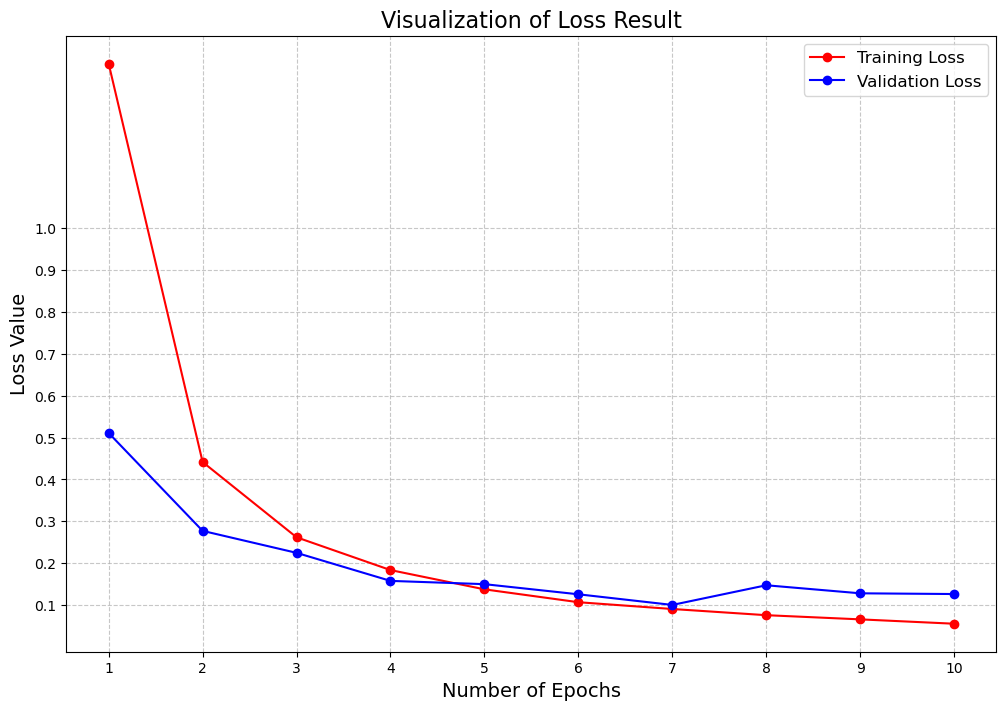

In [182]:
# Lấy dữ liệu từ lịch sử huấn luyện
epochs = [i for i in range(1, 11)]

plt.figure(figsize=(12, 8))
plt.plot(epochs, train_history.history['loss'], 'r-', marker='o', label='Training Loss')
plt.plot(epochs, train_history.history['val_loss'], 'b-', marker='o', label='Validation Loss')
plt.xlabel('Number of Epochs', fontsize=14)
plt.ylabel('Loss Value', fontsize=14)
plt.title('Visualization of Loss Result', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(epochs)
plt.yticks([i/10.0 for i in range(1, 11)])  
plt.show()


### Metrics for model evaluation

In [187]:
class_name = val_set.class_names

In [206]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_set,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17577 files belonging to 38 classes.


In [266]:
y_pred = model.predict(test_set) # Dự đoán trên tập dữ liệu
predicted_categories = tf.argmax(y_pred, axis=1) # Lấy nhãn dự đoán từ ma trận xác suất bằng cách chọn vị trí của giá trị lớn nhất trên mỗi hàng


17577/17577 ━━━━━━━━━━━━━━━━━━━━ 131s 7ms/step


In [267]:
true_categories = tf.concat([y for x, y in test_set], axis=0)  #Kết hợp tất cả các nhãn thực từ tập dữ liệu test_set thành một tensor duy nhất
Y_true = tf.argmax(true_categories, axis=1) #Lấy nhãn thực sự từ tensor true_categories bằng cách chọn vị trí của giá trị lớn nhất trên mỗi hàng

In [268]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [269]:
# In ra báo cáo phân loại bao gồm các chỉ số Precision, Recall và F1-Score cho từng lớp
# target_names=class_name để xác định tên các lớp trong báo cáo
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.87      0.98      0.92       507
                                 Apple___Black_rot       0.99      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.97      0.86      0.91       502
                               Blueberry___healthy       1.00      0.91      0.95       455
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

#### Confusion Matrix Visualization


<Figure size 2000x500 with 0 Axes>

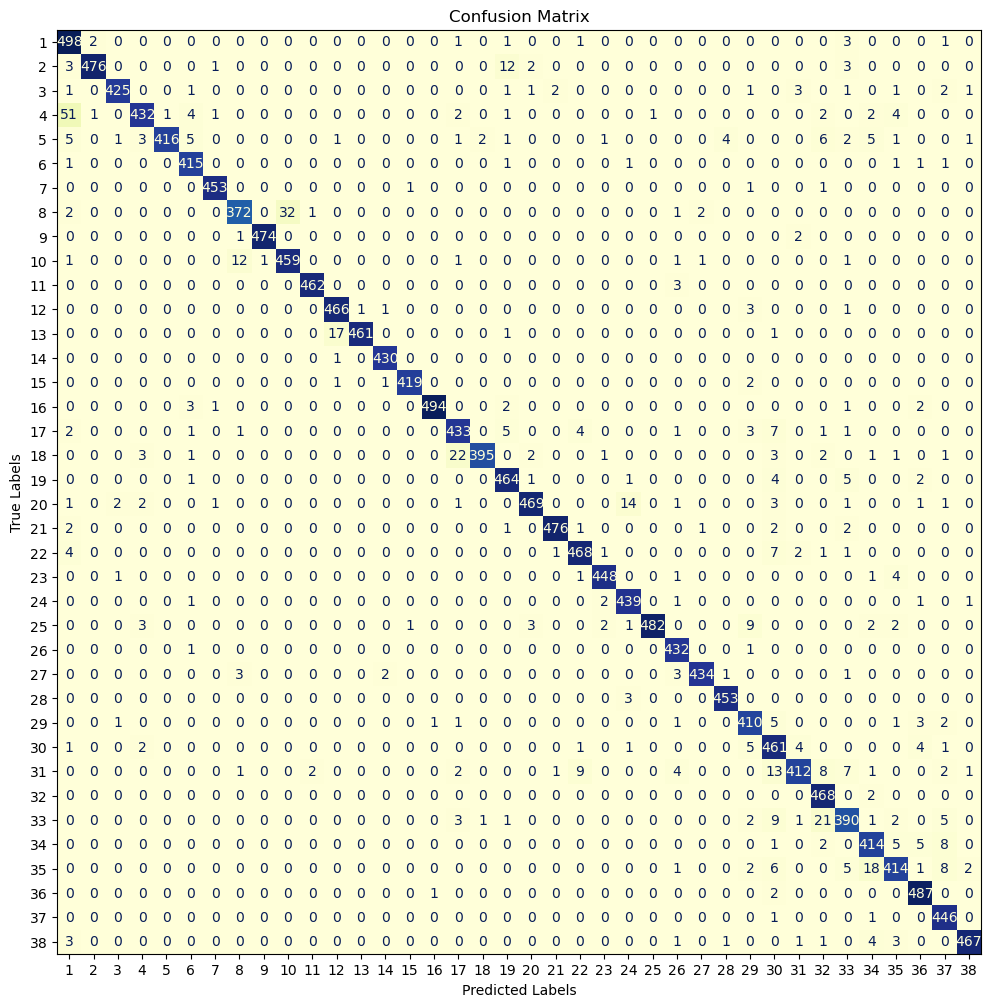

In [271]:
# Plot a confusion matrix based on the true labels and predicted labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize= (20,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Test on single image

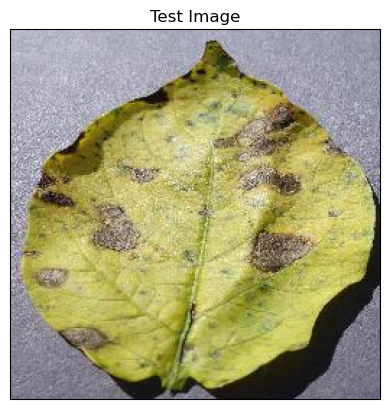

In [273]:
#Test Image Visualization
import cv2
image_path = 'Data_Plant_Disease/test/test/PotatoEarlyBlight4.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [274]:
# Load and resize the image, convert it to a NumPy array, convert to a batch, and make predictions
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [275]:
result_index = np.argmax(predictions) #Return index of max element
print(predictions)
print(result_index)

[[1.0258581e-12 3.9845096e-18 8.9217385e-17 3.3059397e-15 4.6638958e-17
  3.7669297e-14 2.6088113e-19 1.4972997e-16 2.3623503e-12 1.8983462e-16
  1.9169142e-19 1.3142607e-21 6.6207847e-21 1.4989904e-17 6.1245261e-23
  2.1181542e-16 1.2220564e-15 3.9926922e-20 1.7050529e-15 2.3724646e-16
  1.0000000e+00 3.6730159e-13 9.2104298e-16 6.7116718e-20 1.3381358e-18
  8.4936957e-15 6.9994415e-17 1.2340093e-18 4.2189413e-20 1.6532030e-14
  4.1981115e-12 7.8217967e-17 3.5761452e-13 6.7983200e-23 1.1963981e-19
  1.1504981e-21 1.1232546e-22 5.5233410e-18]]
20


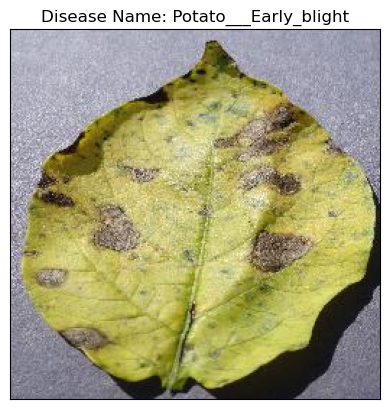

In [276]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()